#### Data Preprocessing
Data preprocessing is a crucial step in preparing data for analysis or machine learning tasks. It involves cleaning, transforming, and organizing raw data into a format that can be easily analyzed or fed into algorithms.

In [1]:
#loading data from a CSV file into a pandas DataFrame
# and setting the first row as the header.
import pandas as pd
import numpy as np
df = pd.read_csv('StudentsPerformance.csv', header=0)
# Display the first few rows of the DataFrame
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)
# Display the data types of each column
print("Data types of each column:")
print(df.dtypes)

Shape of the DataFrame: (1000, 8)
Data types of each column:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


#### Check for missing values 

In [3]:
#checking for missing values in the DataFrame
print("Checking for missing values in the DataFrame:")
print(df.isnull().sum())

Checking for missing values in the DataFrame:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


#### Encoding use one-hot encode and Drop unuseful features 

In [4]:
#drop column race/etnicity and parental level of education
df_reduced = df.drop(['race/ethnicity','parental level of education'], axis=1)
# One-hot encode remaining categorical columns
df_encoded = pd.get_dummies(df_reduced)
df_encoded.head()

,math score,reading score,writing score,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,True,False,False,True,False,True
1,69,90,88,True,False,False,True,True,False
2,90,95,93,True,False,False,True,False,True
3,47,57,44,False,True,True,False,False,True
4,76,78,75,False,True,False,True,False,True


#### Feature Scaling using Standaization (z-score normalization)
use the feature scaling using standardization (z-score normalization) because standardization centers all features to mean 0 and variance 1, making them comparable in scale.

In [5]:
#use standarscaler to scale the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)


Scaled features shape before applying any machine learning alghoritms: (1000, 9)


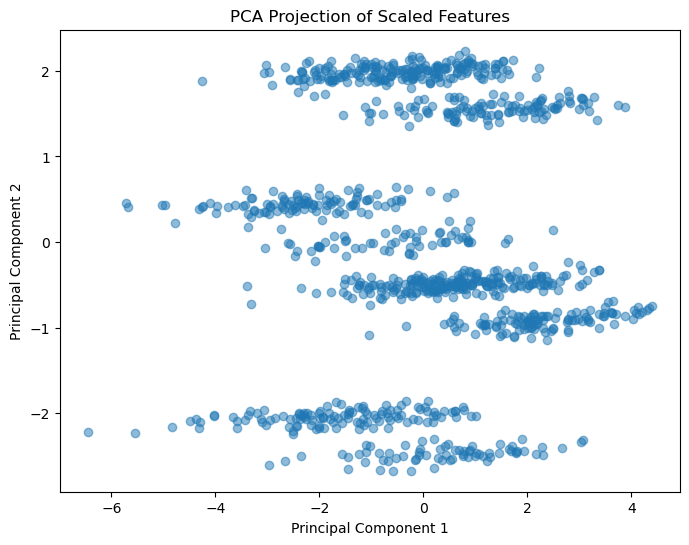

In [6]:
# Visualizing the scaled features using PCA before applying any machine learning algorithms.
print("Scaled features shape before applying any machine learning alghoritms:", scaled_features.shape)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8,6))
plt.scatter(reduced_features[:,0], reduced_features[:,1], alpha=0.5)
plt.title('PCA Projection of Scaled Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [7]:
# Find indices of outliers (e.g., points far from the center)
import numpy as np

# Calculate distance from origin in PCA space
distances = np.linalg.norm(reduced_features, axis=1)
# Set a threshold (e.g., top 1% farthest points)
threshold = np.percentile(distances, 99)
outlier_indices = np.where(distances > threshold)[0]

# Display outlier rows
print(df.iloc[outlier_indices])

     gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced   
211    male        group C                some college  free/reduced   
327    male        group A                some college  free/reduced   
338  female        group B            some high school  free/reduced   
363  female        group D            some high school  free/reduced   
596    male        group B                 high school  free/reduced   
896    male        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17         

In [8]:
# Remove outliers from your features
filtered_features = scaled_features[distances <= threshold]

Scaled features shape before applying any machine learning alghoritms: (1000, 9)


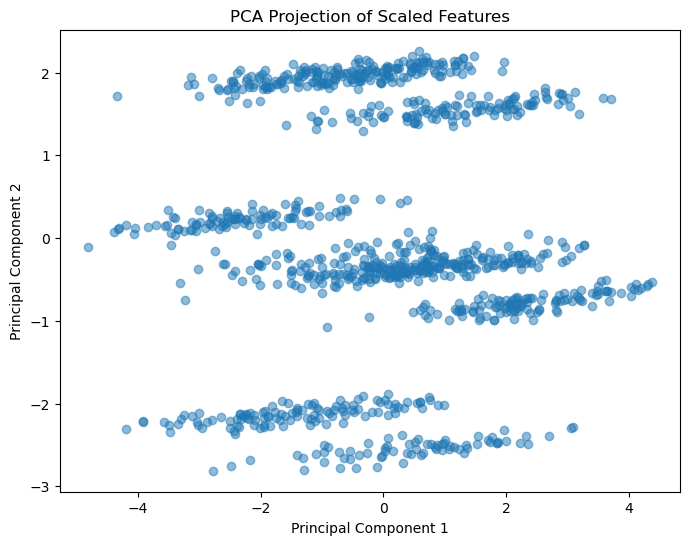

In [9]:
# Visualizing the scaled features using PCA before applying any machine learning algorithms.
print("Scaled features shape before applying any machine learning alghoritms:", scaled_features.shape)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(filtered_features)

plt.figure(figsize=(8,6))
plt.scatter(reduced_features[:,0], reduced_features[:,1], alpha=0.5)
plt.title('PCA Projection of Scaled Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Implementing Clustering Methodology
• Applied K-Means Clustering to group customers. 
• Used PCA for dimensionality reduction & visualization.

In [32]:
# use silhouette to see the best number of clusters for the dataset
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(filtered_features)
    score = silhouette_score(filtered_features, clusters)
    print(f"Silhouette Score for k={k}: {score:.3f}")
# in this case, the best number of clusters is 7 with a silhouette score of 0.426

c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Silhouette Score for k=2: 0.277
Silhouette Score for k=3: 0.301
Silhouette Score for k=4: 0.325
Silhouette Score for k=5: 0.377
Silhouette Score for k=6: 0.414
Silhouette Score for k=7: 0.426
Silhouette Score for k=8: 0.445
Silhouette Score for k=9: 0.431


c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Silhouette Score for k=2: 0.277
Silhouette Score for k=3: 0.301
Silhouette Score for k=4: 0.325
Silhouette Score for k=5: 0.377
Silhouette Score for k=6: 0.414
Silhouette Score for k=7: 0.426
Silhouette Score for k=8: 0.445
Silhouette Score for k=9: 0.431


c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


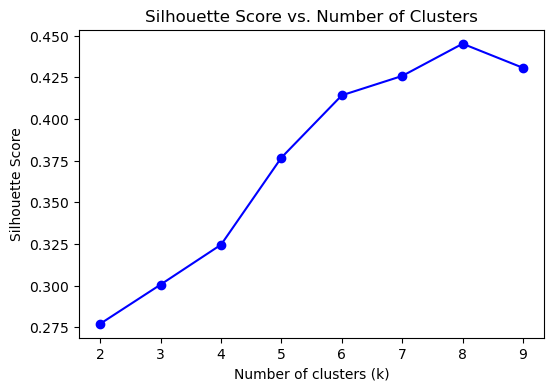

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(filtered_features)
    score = silhouette_score(filtered_features, clusters)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.3f}")

# Plot silhouette scores
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(K)
plt.show()

c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

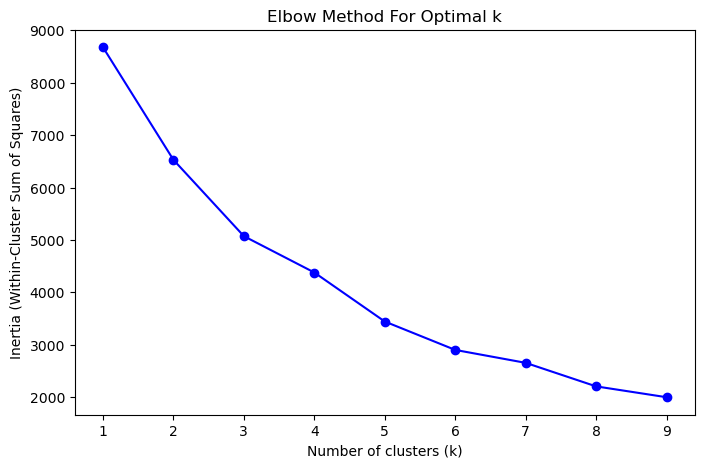

In [34]:
# Elbow Method to determine the optimal number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)  # Try k from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(filtered_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.show()

#### We are going to use K 7 because it's saver and easier to interpret and also 6 to 7 is the best intertia and we see the potential of elbow in these 2 number of clulsters to interpret clusters eventhough in silhouette k8 is the best cluster quality

In [44]:
from sklearn.decomposition import PCA

# Reduce filtered_features to 2 principal components for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(filtered_features)
# Get the mask for non-outlier rows
mask = distances <= threshold

# Filter df_encoded to match filtered_features
df_encoded_filtered = df_encoded[mask].copy()

# Run KMeans on filtered_features
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(filtered_features)

# Add cluster labels to the filtered DataFrame
df_encoded_filtered['cluster'] = clusters

# Show the first few rows with cluster labels
df_encoded_filtered

c:\Users\zulfa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,math score,reading score,writing score,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,cluster
0,72,72,74,True,False,False,True,False,True,1
1,69,90,88,True,False,False,True,True,False,5
2,90,95,93,True,False,False,True,False,True,1
3,47,57,44,False,True,True,False,False,True,3
4,76,78,75,False,True,False,True,False,True,6
...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,True,False,False,True,True,False,5
996,62,55,55,False,True,True,False,False,True,3
997,59,71,65,True,False,True,False,True,False,0
998,68,78,77,True,False,False,True,True,False,5


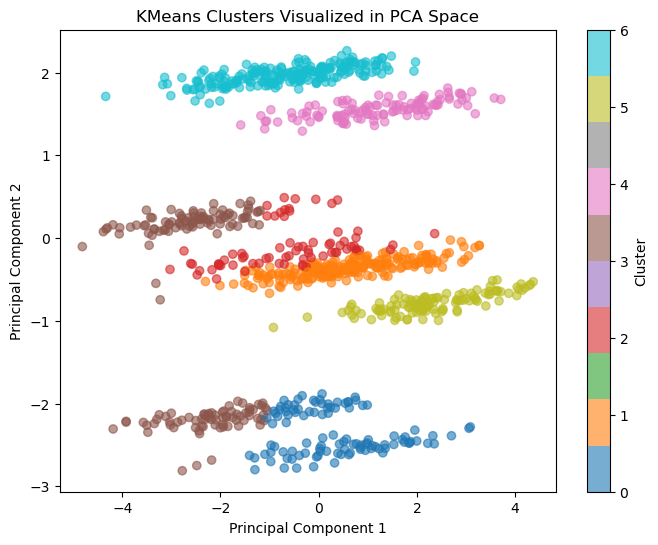

In [45]:
import numpy as np

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    pca_features[:, 0], 
    pca_features[:, 1], 
    c=clusters, 
    cmap='tab10', 
    alpha=0.6
)
plt.title('KMeans Clusters Visualized in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set colorbar ticks to match the number of clusters
cbar = plt.colorbar(scatter, ticks=np.arange(7))
cbar.set_label('Cluster')
plt.show()

In [46]:
# Show the percentage of each cluster
cluster_counts = df_encoded_filtered['cluster'].value_counts(normalize=True) * 100
print("Percentage of each cluster:")
print(cluster_counts.sort_index())

Percentage of each cluster:
cluster
0    11.010101
1    21.515152
2     7.474747
3    16.565657
4    11.414141
5    11.515152
6    20.505051
Name: proportion, dtype: float64


In [47]:
# Calculate the mean of the combined (average) score for each cluster

df_encoded_filtered['average_score'] = (
    df_encoded_filtered[['math score', 'reading score', 'writing score']].mean(axis=1)
)
mean_combined_score = df_encoded_filtered.groupby('cluster')['average_score'].mean()
print(mean_combined_score.sort_values(ascending=False))

cluster
5    77.479532
4    73.513274
0    72.498471
1    71.350548
2    68.009009
6    65.486043
3    54.587398
Name: average_score, dtype: float64


In [48]:
# Show the mean of all features for each cluster (numeric only)
cluster_summary = df_encoded_filtered.groupby('cluster').mean(numeric_only=True)
print(cluster_summary)

# For categorical features (one-hot encoded), you can see the proportion in each cluster
categorical_columns = [col for col in df_encoded_filtered.columns if 'gender_' in col or 'test preparation course_'  in col or 'lunch_' in col]
for col in categorical_columns:
    print(f"\nProportion of {col} in each cluster:")
    print(df_encoded_filtered.groupby('cluster')[col].mean())

         math score  reading score  writing score  gender_female  gender_male  \
cluster                                                                         
0         64.486239      76.495413      76.513761       1.000000     0.000000   
1         66.929577      73.760563      73.361502       1.000000     0.000000   
2         68.500000      68.270270      67.256757       0.000000     1.000000   
3         52.676829      56.957317      54.128049       0.463415     0.536585   
4         75.955752      72.601770      71.982301       0.000000     1.000000   
5         71.131579      79.798246      81.508772       1.000000     0.000000   
6         69.832512      64.719212      61.906404       0.000000     1.000000   

         lunch_free/reduced  lunch_standard  \
cluster                                       
0                  1.000000        0.000000   
1                  0.000000        1.000000   
2                  1.000000        0.000000   
3                  0.987805        

In [49]:
# Show the proportion of test preparation course status in each cluster
print("Proportion of students who completed the test preparation course in each cluster:")
print(df_encoded_filtered.groupby('cluster')['test preparation course_completed'].mean())

print("\nProportion of students who did NOT complete the test preparation course in each cluster:")
print(df_encoded_filtered.groupby('cluster')['test preparation course_none'].mean())

Proportion of students who completed the test preparation course in each cluster:
cluster
0    0.614679
1    0.000000
2    0.824324
3    0.018293
4    1.000000
5    1.000000
6    0.000000
Name: test preparation course_completed, dtype: float64

Proportion of students who did NOT complete the test preparation course in each cluster:
cluster
0    0.385321
1    1.000000
2    0.175676
3    0.981707
4    0.000000
5    0.000000
6    1.000000
Name: test preparation course_none, dtype: float64
